In [43]:
!pip install -q opendatasets

import opendatasets as od

od.download('https://www.kaggle.com/datasets/notlucasp/financial-news-headlines/data') # insert ypu kaggle  username and key
#username: aidankim0510
#key: 01ed098689c2156e31cbc723fa2e1517

Skipping, found downloaded files in "./financial-news-headlines" (use force=True to force download)


In [45]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
import sklearn

#Basic EDA on cnbc dataset

In [47]:
cnbc = pd.read_csv('/content/financial-news-headlines/cnbc_headlines.csv')

In [48]:
cnbc.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [49]:
cnbc.shape

(3080, 3)

In [50]:
cnbc.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [51]:
cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [52]:
cnbc.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

In [53]:
cnbc.dropna(inplace=True)

In [54]:
cnbc.reset_index(inplace=True, drop=True)

In [55]:
cnbc

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
2795,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
2796,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
2797,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
2798,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [56]:
cnbc.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [57]:
#checking duplicate records
dup_list = list(cnbc.duplicated(keep='first').values)
dup_list.count(True)

0

In [58]:
cnbc.shape

(2800, 3)

#Basic EDA on guard dataset

In [59]:
guard_data = pd.read_csv('/content/financial-news-headlines/guardian_headlines.csv')

In [60]:
guard_data.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [61]:
guard_data.shape

(17800, 2)

In [62]:
guard_data.columns

Index(['Time', 'Headlines'], dtype='object')

In [63]:
guard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [64]:
guard_data.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [65]:
guard_data.drop_duplicates(keep='first', inplace=True)
guard_data

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...


#Basic EDA on reuters dataset

In [66]:
reuters = pd.read_csv('/content/financial-news-headlines/reuters_headlines.csv')

In [67]:
reuters.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [68]:
reuters.shape

(32770, 3)

In [69]:
reuters.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [70]:
reuters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [71]:
reuters.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [72]:
reuters.drop_duplicates(keep='first', inplace=True)
reuters

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [73]:
reuters.reset_index(drop=True, inplace=True)

#Supporting functions for preprocessing and modelling

In [74]:
#preprocessing words

def preprocessing_text(data):
  data = data.lower()
  data = re.sub(r'[^\w\s]', '', data, flags=re.MULTILINE)
  tokens = word_tokenize(data)
  word_tokens = [w for w in tokens if w not in stop_words]
  stemmer = PorterStemmer()
  stem_words = [stemmer.stem(w) for w in word_tokens]
  lemmer = WordNetLemmatizer()
  lem_words = [lemmer.lemmatize(w) for w in stem_words]
  return " ".join(lem_words)


In [75]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [76]:
#function to decide sentiment as positive, negative, or neutral

def mapper(data):
  if data > 0:
    return "Positive"
  elif data < 0:
    return "Negative"
  else:
    return "Neutral"

def sentiment_analysis(df, colm_name):
  df['polarity_scores'] = df[colm_name].apply(lambda w: SIA.polarity_scores(w))
  df['compound_score'] = df['polarity_scores'].apply(lambda x: x['compound'])
  df['ds_score'] = df['compound_score'].apply(mapper)
  df.drop(['polarity_scores', 'compound_score'], axis=1, inplace=True)
  return df

#Analyzing descriptions

In [77]:
cnbc_reuters = pd.concat([cnbc, reuters], axis=0)

In [78]:
cnbc_reuters.shape

(35515, 3)

In [79]:
cnbc_reu = cnbc_reuters.copy()

In [80]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
cnbc_reu['Description'] = cnbc_reu['Description'].apply(preprocessing_text)
cnbc_reu

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...
...,...,...,...
32710,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...
32711,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...
32712,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...
32713,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...


In [82]:
df = sentiment_analysis(cnbc_reu, 'Description')
df

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,Negative
...,...,...,...,...
32710,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,Neutral
32711,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,Neutral
32712,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,Negative
32713,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,Negative


<Axes: xlabel='ds_score', ylabel='count'>

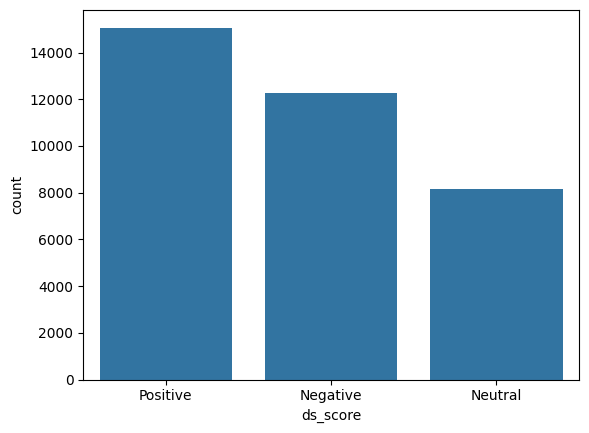

In [83]:
sns.countplot(x='ds_score', data=df)

In [84]:
df['ds_score'].value_counts()

Positive    15067
Negative    12279
Neutral      8169
Name: ds_score, dtype: int64

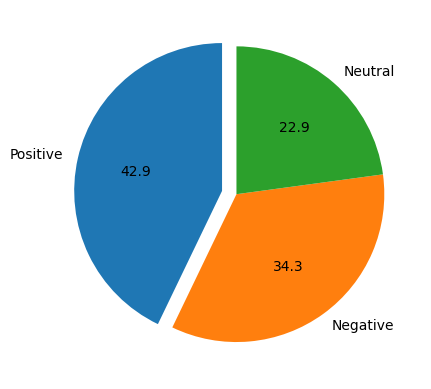

In [85]:
plt.pie([15000, 12000, 8000], explode=[0.1, 0, 0], labels=['Positive',
                                                           'Negative',
                                                           'Neutral'],
        autopct='%.1f', startangle=90)
plt.show()

#Modeling on description based dataset

In [86]:
from sklearn.model_selection import train_test_split

X= df['Description']
y = df.ds_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=212)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31963,) (3552,) (31963,) (3552,)


In [87]:
#Linear Support Vector Machine Model

%%time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

lin_svc_ds = Pipeline([('tfidf', TfidfVectorizer()),
                       ('lin_svc', LinearSVC())])

lin_svc_ds.fit(X_train, y_train)

pred = lin_svc_ds.predict(X_test)

print("MODEL: LINEAR SVC")

print("accuracy score: ", accuracy_score(y_test, pred))

print("Confusion matrix: ", confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

MODEL: LINEAR SVC
accuracy score:  0.932713963963964
Confusion matrix:  [[1123   45   71]
 [  22  762   20]
 [  50   31 1428]]
              precision    recall  f1-score   support

    Negative       0.94      0.91      0.92      1239
     Neutral       0.91      0.95      0.93       804
    Positive       0.94      0.95      0.94      1509

    accuracy                           0.93      3552
   macro avg       0.93      0.93      0.93      3552
weighted avg       0.93      0.93      0.93      3552

CPU times: user 1.67 s, sys: 29 ms, total: 1.7 s
Wall time: 1.72 s


In [88]:
#Logistic Regression

#for measuring the run time
%%time

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression

log_reg_ds = Pipeline([('count_vec', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('log_reg', LogisticRegression())])

log_reg_ds.fit(X_train, y_train)

pred = log_reg_ds.predict(X_test)

print("MODEL: LOGISTIC REGRESSION")

print("accuracy score: ", accuracy_score(y_test, pred))

print("Confusion matrix: ", confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODEL: LOGISTIC REGRESSION
accuracy score:  0.8932995495495496
Confusion matrix:  [[1052   79  108]
 [  38  729   37]
 [  69   48 1392]]
              precision    recall  f1-score   support

    Negative       0.91      0.85      0.88      1239
     Neutral       0.85      0.91      0.88       804
    Positive       0.91      0.92      0.91      1509

    accuracy                           0.89      3552
   macro avg       0.89      0.89      0.89      3552
weighted avg       0.89      0.89      0.89      3552

CPU times: user 4.75 s, sys: 4.23 s, total: 8.98 s
Wall time: 5.16 s


In [89]:
#Multinomial Naive Bayes

%%time

from sklearn.naive_bayes import MultinomialNB

multi_nb_ds = Pipeline([('count_vec', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('multi_nb', MultinomialNB())])

multi_nb_ds.fit(X_train, y_train)

pred = multi_nb_ds.predict(X_test)

print("MODEL: MULTINOMIAL NB")

print("accuracy score: ", accuracy_score(y_test, pred))

print("confusion matrix: ", confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

MODEL: MULTINOMIAL NB
accuracy score:  0.6396396396396397
confusion matrix:  [[ 808    8  423]
 [ 150   86  568]
 [ 128    3 1378]]
              precision    recall  f1-score   support

    Negative       0.74      0.65      0.70      1239
     Neutral       0.89      0.11      0.19       804
    Positive       0.58      0.91      0.71      1509

    accuracy                           0.64      3552
   macro avg       0.74      0.56      0.53      3552
weighted avg       0.71      0.64      0.59      3552

CPU times: user 1.21 s, sys: 6.81 ms, total: 1.21 s
Wall time: 1.22 s


In [90]:
#Bernoulli Naive Bayes

%%time

from sklearn.naive_bayes import BernoulliNB

bern_nb_ds = Pipeline([('count_vec', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('bern_nb', BernoulliNB())])

bern_nb_ds.fit(X_train, y_train)

pred = bern_nb_ds.predict(X_test)

print("MODEL: BERNOULLI's NB")

print("accuracy score: ", accuracy_score(y_test, pred))

print("confusion matrix: ", confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

MODEL: BERNOULLI's NB
accuracy score:  0.7395833333333334
confusion matrix:  [[ 919   56  264]
 [ 135  480  189]
 [ 210   71 1228]]
              precision    recall  f1-score   support

    Negative       0.73      0.74      0.73      1239
     Neutral       0.79      0.60      0.68       804
    Positive       0.73      0.81      0.77      1509

    accuracy                           0.74      3552
   macro avg       0.75      0.72      0.73      3552
weighted avg       0.74      0.74      0.74      3552

CPU times: user 1.02 s, sys: 3.2 ms, total: 1.03 s
Wall time: 1.03 s


In [91]:
#Gradient Boosting Classification Model

%%time

from sklearn.ensemble import GradientBoostingClassifier

grad_boost_ds = Pipeline([('count_vec', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('grad_boost', GradientBoostingClassifier())])

grad_boost_ds.fit(X_train, y_train)

pred = grad_boost_ds.predict(X_test)

print("MODEL: Gradient Boosting")

print("accuracy score: ", accuracy_score(y_test, pred))

print("confusion matrix: ", confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))


MODEL: Gradient Boosting
accuracy score:  0.8378378378378378
confusion matrix:  [[ 899  169  171]
 [  11  784    9]
 [  69  147 1293]]
              precision    recall  f1-score   support

    Negative       0.92      0.73      0.81      1239
     Neutral       0.71      0.98      0.82       804
    Positive       0.88      0.86      0.87      1509

    accuracy                           0.84      3552
   macro avg       0.84      0.85      0.83      3552
weighted avg       0.85      0.84      0.84      3552

CPU times: user 1min 30s, sys: 107 ms, total: 1min 30s
Wall time: 1min 32s


In [92]:
#XGBOOST Classification Model

%%time

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

xg_boost_ds = Pipeline([('count_vec', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('xgb', XGBClassifier())])

encoder = LabelEncoder()
enc_train = encoder.fit_transform(y_train)
enc_test = encoder.fit_transform(y_test)


xg_boost_ds.fit(X_train, enc_train)

pred = xg_boost_ds.predict(X_test)

print("MODEL: XG Boost")

print("accuracy score: ", accuracy_score(enc_test, pred))

print("confusion matrix: ", confusion_matrix(enc_test, pred))

print(classification_report(enc_test, pred))

MODEL: XG Boost
accuracy score:  0.8826013513513513
confusion matrix:  [[ 991  130  118]
 [  11  784    9]
 [  56   93 1360]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1239
           1       0.78      0.98      0.87       804
           2       0.91      0.90      0.91      1509

    accuracy                           0.88      3552
   macro avg       0.88      0.89      0.88      3552
weighted avg       0.89      0.88      0.88      3552

CPU times: user 2min 46s, sys: 877 ms, total: 2min 47s
Wall time: 1min 38s


In [93]:
#helper function to compare model metrics

def metric_comparison(model_objects, model_names, X_test, y_test, enc_test):

  metrics_df = pd.DataFrame(columns=['model_names', 'accuracy', 'precision', 'recall',
                                     'f1_score'])
  metrics_df['model_names'] = model_names

  metrics_df['accuracy'] = [accuracy_score(y_test, model.predict(X_test)) if model != xg_boost_ds else accuracy_score(enc_test, model.predict(X_test)) for model in model_objects]
  metrics_df['precision'] = [precision_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else precision_score(enc_test, model.predict(X_test), average='weighted') for model in model_objects]
  metrics_df['recall'] = [recall_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else recall_score(enc_test, model.predict(X_test),average='weighted') for model in model_objects]
  metrics_df['f1_score'] = [f1_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else f1_score(enc_test, model.predict(X_test), average='weighted') for model in model_objects]

  return metrics_df


In [94]:
model_objects = [lin_svc_ds, log_reg_ds, multi_nb_ds, bern_nb_ds,
                 grad_boost_ds, xg_boost_ds]

model_names = ['LinearSVC', 'LogRegression', 'MultinomialNB',
               'BernoulliNB', 'GradientBoost', 'XGBoost']

met_df = metric_comparison(model_objects, model_names, X_test, y_test,
                           enc_test)

met_df

,model_names,accuracy,precision,recall,f1_score
0,LinearSVC,0.932714,0.933004,0.932714,0.932659
1,LogRegression,0.893300,0.894136,0.893300,0.893149
2,MultinomialNB,0.639640,0.707324,0.639640,0.587574
3,BernoulliNB,0.739583,0.742950,0.739583,0.737226
4,GradientBoost,0.837838,0.854557,0.837838,0.837587
5,XGBoost,0.882601,0.891501,0.882601,0.882656


In [95]:
#working with test dataset

pred = lin_svc_ds.predict(X_test)
pred

array(['Negative', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [96]:
pred_df = pd.DataFrame(pred, columns=['predictions'])

In [97]:
pred_df

,predictions
0,Negative
1,Positive
2,Positive
3,Positive
4,Negative
...,...
3547,Negative
3548,Positive
3549,Positive
3550,Positive


#Now working with headlines + description

In [98]:
cnbc_reu['info'] = cnbc_reu['Headlines'] + ' ' + cnbc_reu['Description']

cnbc_reu.head(10)

,Headlines,Time,Description,ds_score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative,Cramer's lightning round: I would own Teradyne...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive,"Cramer's week ahead: Big week for earnings, ev..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive,IQ Capital CEO Keith Bliss says tech and healt...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,Negative,Wall Street delivered the 'kind of pullback I'...
5,Cramer's lightning round: I would just stay lo...,"7:23 PM ET Thu, 16 July 2020",mad money host jim cramer ring lightn round be...,Negative,Cramer's lightning round: I would just stay lo...
6,Acorns CEO: Parents can turn $5 into five figu...,"8:03 PM ET Thu, 16 July 2020",invest 5 per day compound 70000 time child rea...,Positive,Acorns CEO: Parents can turn $5 into five figu...
7,Dividend cuts may mean rethinking your retirem...,"8:54 AM ET Thu, 16 July 2020",hundr compani cut suspend dividend far year se...,Negative,Dividend cuts may mean rethinking your retirem...
8,StockX has authenticated 1 million Jordan snea...,"8:25 PM ET Wed, 15 July 2020",weve abl captur cultur moment like espn releas...,Negative,StockX has authenticated 1 million Jordan snea...
9,Biohaven Pharmaceuticals lands Khloe Kardashia...,"7:51 PM ET Wed, 15 July 2020",biohaven ceo vlad coric said compani brought k...,Neutral,Biohaven Pharmaceuticals lands Khloe Kardashia...


In [99]:
cnbc_new = cnbc_reu.drop(['Headlines', 'Description', 'ds_score'], axis=1)
cnbc_new.head(10)

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
2,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
3,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
4,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...
5,"7:23 PM ET Thu, 16 July 2020",Cramer's lightning round: I would just stay lo...
6,"8:03 PM ET Thu, 16 July 2020",Acorns CEO: Parents can turn $5 into five figu...
7,"8:54 AM ET Thu, 16 July 2020",Dividend cuts may mean rethinking your retirem...
8,"8:25 PM ET Wed, 15 July 2020",StockX has authenticated 1 million Jordan snea...
9,"7:51 PM ET Wed, 15 July 2020",Biohaven Pharmaceuticals lands Khloe Kardashia...


In [100]:
cnbc_new['info'] = cnbc_new['info'].apply(preprocessing_text)
cnbc_new.head(10)

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradyn mad money ho...
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...
5,"7:23 PM ET Thu, 16 July 2020",cramer lightn round would stay long wex mad mo...
6,"8:03 PM ET Thu, 16 July 2020",acorn ceo parent turn 5 five figur kid power c...
7,"8:54 AM ET Thu, 16 July 2020",dividend cut may mean rethink retir incom stra...
8,"8:25 PM ET Wed, 15 July 2020",stockx authent 1 million jordan sneaker year c...
9,"7:51 PM ET Wed, 15 July 2020",biohaven pharmaceut land khloe kardashian infl...


In [101]:
cnbc_new = sentiment_analysis(cnbc_new, 'info')
cnbc_new.head(10)

,Time,info,ds_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradyn mad money ho...,Negative
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...,Positive
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative
5,"7:23 PM ET Thu, 16 July 2020",cramer lightn round would stay long wex mad mo...,Negative
6,"8:03 PM ET Thu, 16 July 2020",acorn ceo parent turn 5 five figur kid power c...,Positive
7,"8:54 AM ET Thu, 16 July 2020",dividend cut may mean rethink retir incom stra...,Negative
8,"8:25 PM ET Wed, 15 July 2020",stockx authent 1 million jordan sneaker year c...,Negative
9,"7:51 PM ET Wed, 15 July 2020",biohaven pharmaceut land khloe kardashian infl...,Neutral


<Axes: xlabel='ds_score', ylabel='count'>

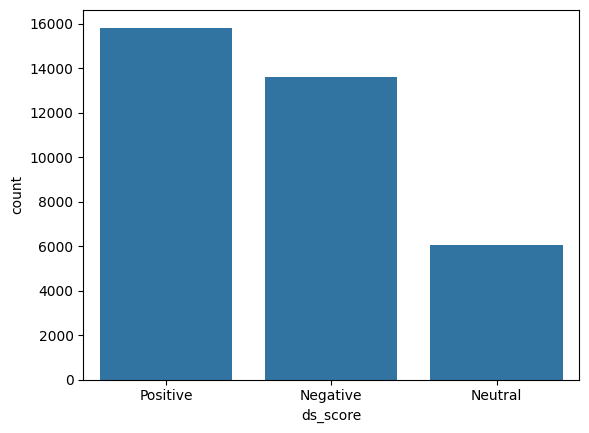

In [102]:
sns.countplot(x='ds_score', data=cnbc_new)

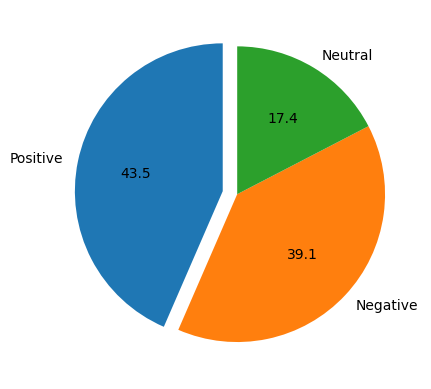

In [103]:
plt.pie([15000, 13500, 6000], explode=[0.1, 0, 0], labels=['Positive',
                                                           'Negative',
                                                           'Neutral'],
        autopct='%.1f', startangle=90)
plt.show()

#Modeling on headlines + description

In [104]:
X = cnbc_new['info']
y = cnbc_new.ds_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=212)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31963,) (3552,) (31963,) (3552,)


In [105]:
#Linear Support Vector Machine

%%time

lin_svc_info = Pipeline([('tfidf', TfidfVectorizer()),
                       ('lin_svc', LinearSVC())])

lin_svc_info.fit(X_train, y_train)

pred = lin_svc_info.predict(X_test)

print("MODEL: LINEAR SVC")

print("accuracy score: ", accuracy_score(y_test, pred))

print("Confusion matrix: ", confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

MODEL: LINEAR SVC
accuracy score:  0.901463963963964
Confusion matrix:  [[1212   45   91]
 [  40  502   52]
 [  73   49 1488]]
              precision    recall  f1-score   support

    Negative       0.91      0.90      0.91      1348
     Neutral       0.84      0.85      0.84       594
    Positive       0.91      0.92      0.92      1610

    accuracy                           0.90      3552
   macro avg       0.89      0.89      0.89      3552
weighted avg       0.90      0.90      0.90      3552

CPU times: user 2.14 s, sys: 29.9 ms, total: 2.17 s
Wall time: 2.19 s


In [106]:
#Logistic Regression

%%time

log_reg_info = Pipeline([('count_vec', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('log_reg', LogisticRegression())])

log_reg_info.fit(X_train, y_train)

pred = log_reg_info.predict(X_test)

print("MODEL: LOGISTIC REGRESSION")

print("accuracy score: ", accuracy_score(y_test, pred))

print("Confusion matrix: ", confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODEL: LOGISTIC REGRESSION
accuracy score:  0.8693693693693694
Confusion matrix:  [[1187   48  113]
 [  78  432   84]
 [  92   49 1469]]
              precision    recall  f1-score   support

    Negative       0.87      0.88      0.88      1348
     Neutral       0.82      0.73      0.77       594
    Positive       0.88      0.91      0.90      1610

    accuracy                           0.87      3552
   macro avg       0.86      0.84      0.85      3552
weighted avg       0.87      0.87      0.87      3552

CPU times: user 5.68 s, sys: 5.14 s, total: 10.8 s
Wall time: 6.71 s


In [107]:
#Multinomial Naive Bayes

%%time

multi_nb_info = Pipeline([('count_vec', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('multi_nb', MultinomialNB())])

multi_nb_info.fit(X_train, y_train)

pred = multi_nb_info.predict(X_test)

print("MODEL: MULTINOMIAL NB")

print("accuracy score: ", accuracy_score(y_test, pred))

print("confusion matrix: ", confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

MODEL: MULTINOMIAL NB
accuracy score:  0.6697635135135135
confusion matrix:  [[ 958    0  390]
 [ 160   13  421]
 [ 202    0 1408]]
              precision    recall  f1-score   support

    Negative       0.73      0.71      0.72      1348
     Neutral       1.00      0.02      0.04       594
    Positive       0.63      0.87      0.74      1610

    accuracy                           0.67      3552
   macro avg       0.79      0.54      0.50      3552
weighted avg       0.73      0.67      0.61      3552

CPU times: user 1.23 s, sys: 10.1 ms, total: 1.24 s
Wall time: 1.25 s


In [108]:
#Bernoulli Naive Bayes

%%time

bern_nb_info = Pipeline([('count_vec', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('bern_nb', BernoulliNB())])

bern_nb_info.fit(X_train, y_train)

pred = bern_nb_info.predict(X_test)

print("MODEL: BERNOULLI's NB")

print("accuracy score: ", accuracy_score(y_test, pred))

print("confusion matrix: ", confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

MODEL: BERNOULLI's NB
accuracy score:  0.7212837837837838
confusion matrix:  [[1007   47  294]
 [ 137  285  172]
 [ 269   71 1270]]
              precision    recall  f1-score   support

    Negative       0.71      0.75      0.73      1348
     Neutral       0.71      0.48      0.57       594
    Positive       0.73      0.79      0.76      1610

    accuracy                           0.72      3552
   macro avg       0.72      0.67      0.69      3552
weighted avg       0.72      0.72      0.72      3552

CPU times: user 1.25 s, sys: 7.99 ms, total: 1.26 s
Wall time: 1.26 s


In [109]:
#Gradient Boosting Classification Model

%%time

grad_boost_info = Pipeline([('count_vec', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('grad_boost', GradientBoostingClassifier())])

grad_boost_info.fit(X_train, y_train)

pred = grad_boost_info.predict(X_test)

print("MODEL: Gradient Boosting")

print("accuracy score: ", accuracy_score(y_test, pred))

print("confusion matrix: ", confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

MODEL: Gradient Boosting
accuracy score:  0.7649211711711712
confusion matrix:  [[ 988   67  293]
 [   4  288  302]
 [ 116   53 1441]]
              precision    recall  f1-score   support

    Negative       0.89      0.73      0.80      1348
     Neutral       0.71      0.48      0.57       594
    Positive       0.71      0.90      0.79      1610

    accuracy                           0.76      3552
   macro avg       0.77      0.70      0.72      3552
weighted avg       0.78      0.76      0.76      3552

CPU times: user 1min 42s, sys: 123 ms, total: 1min 42s
Wall time: 1min 42s


In [110]:
#XGBoost Classification Model

%%time

xg_boost_ds = Pipeline([('count_vec', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('xgb', XGBClassifier())])

encoder = LabelEncoder()
enc_train = encoder.fit_transform(y_train)
enc_test = encoder.fit_transform(y_test)


xg_boost_ds.fit(X_train, enc_train)

pred = xg_boost_ds.predict(X_test)

print("MODEL: XG Boost")

print("accuracy score: ", accuracy_score(enc_test, pred))

print("confusion matrix: ", confusion_matrix(enc_test, pred))

print(classification_report(enc_test, pred))

MODEL: XG Boost
accuracy score:  0.8848536036036037
confusion matrix:  [[1111  110  127]
 [   4  585    5]
 [  88   75 1447]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1348
           1       0.76      0.98      0.86       594
           2       0.92      0.90      0.91      1610

    accuracy                           0.88      3552
   macro avg       0.87      0.90      0.88      3552
weighted avg       0.89      0.88      0.89      3552

CPU times: user 3min 11s, sys: 757 ms, total: 3min 12s
Wall time: 1min 55s


In [111]:
model_objects = [lin_svc_info, log_reg_info, multi_nb_info, bern_nb_info,
                 grad_boost_info, xg_boost_ds]

model_names = ['LinearSVC', 'LogRegression', 'MultinomialNB',
               'BernoulliNB', 'GradientBoost', 'XGBoost']

met_info_df = metric_comparison(model_objects, model_names, X_test, y_test,
                           enc_test)

met_info_df

,model_names,accuracy,precision,recall,f1_score
0,LinearSVC,0.901464,0.901519,0.901464,0.901448
1,LogRegression,0.869369,0.868196,0.869369,0.868227
2,MultinomialNB,0.669764,0.730264,0.669764,0.613051
3,BernoulliNB,0.721284,0.720319,0.721284,0.716517
4,GradientBoost,0.764921,0.777251,0.764921,0.759753
5,XGBoost,0.884854,0.892907,0.884854,0.885341


In [112]:
#Working with test dataset

prediction = lin_svc_info.predict(X_test)
prediction

array(['Negative', 'Negative', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [113]:
preds = pd.DataFrame(prediction, columns=['predictions'])

In [114]:
preds

,predictions
0,Negative
1,Negative
2,Positive
3,Positive
4,Negative
...,...
3547,Negative
3548,Positive
3549,Neutral
3550,Positive


#Prediction

In [115]:
sent1 = ["Investors Have Cut China’s Internet Giants Down to Size"]
y_predict = lin_svc_ds.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [116]:
sent2 = ["Tech Stocks Drop to Start 2024"]
y_predict = lin_svc_ds.predict(sent2)
y_predict

array(['Negative'], dtype=object)

In [117]:
#headline + description
sent3 = ["The S&P 500 Closes Just Shy of a New Record All three major stock indexes are on pace for their ninth consecutive week of gains"]
y_predict = lin_svc_info.predict(sent3)
y_predict

array(['Positive'], dtype=object)

In [118]:
sent4 = ["Santa Might Have One Last Gift for Investors"]
y_predict = lin_svc_ds.predict(sent4)
y_predict

array(['Positive'], dtype=object)